<a href="https://colab.research.google.com/github/AVasundhara/Data-Analysis-Projects/blob/Sentimental-Analysis/Nykaa_sentimental_analysis_during_pink_Friday_sale_2022_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter data for #nykaa from August 2022 to December 2022 was gathered and cleaned. Calculated the count and percentage of favorable, neutral, and negative sentiments using sentiment analysis. Exploratory data analysis was performed to determine the most popular tweets based on retweets, the number of tweets that differed between months, the geographic location with the most tweets, and the number of verified and influential individuals who mentioned Nykaa. Additionally, graphs were plotted showing the month-by-month distribution of tweet counts, the month-by-month distribution of positive, neutral, and negative feelings, and the geo-location in relation to the number of tweets.

In [ ]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re


In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
import snscrape.modules.twitter as sntwitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-3t7i033k
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-3t7i033k


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
!pip install langdetect
from langdetect import detect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(1)What is the % growth in the tweet as compared to last month? 
(2)How many % of tweets were of positive sentiments?
(3)Top 5 most viral tweets (based upon retweets)?
(4)How many influential people are talking about our product (whose followers are greater than 1000)?
(5)Which geographical location has the most tweets?










In [ ]:

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('(#nykaa) until:2022-12-03 since:2022-08-01').get_items()):
    if i>5000:
        break
    attributes_container.append([tweet.user.username, tweet.date,tweet.date.day,tweet.date.month, tweet.likeCount, tweet.sourceLabel, tweet.content,
                                 tweet.user.location,tweet.retweetCount,tweet.user.verified,tweet.user.followersCount])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Date Created","Day","Month", "Number of Likes", "Source of Tweet", "Tweet",
                                                       "Location","RetweetCount","Is Verified","Followers"])


<ipython-input-28-8de3d327dde7>:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date,tweet.date.day,tweet.date.month, tweet.likeCount, tweet.sourceLabel, tweet.content,


In [ ]:
tweets_df.head()

,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers
0,officialfixed11,2022-12-02 22:01:58+00:00,2,12,1,Twitter for Android,CONGRATULATIONS TO ALL WINNERS YESTERDAY. TODA...,GLOBALLY,1,False,6
1,neel_ekka,2022-12-02 20:17:03+00:00,2,12,0,Twitter for iPhone,Nykaa is therapy!\n\n#nykaa #girl #women https...,"Kolkata, India",0,False,16
2,KANAPARTHI009,2022-12-02 14:41:28+00:00,2,12,1,Twitter for Android,#Nykaa performance since listing..\nHave a pee...,,0,False,106
3,CNBCTV18News,2022-12-02 14:07:18+00:00,2,12,15,Twitter Media Studio,"#EditorsRoundtable | #Nykaa, #PBFintech, #Payt...",,8,True,1084274
4,StockInvesta,2022-12-02 12:58:20+00:00,2,12,7,Buffer,#FII DII Activity\n\nFollow @StockInvesta now\...,Mumbai,4,False,1070


In [ ]:
tweets_df.dtypes

User                            object
Date Created       datetime64[ns, UTC]
Day                              int64
Month                            int64
Number of Likes                  int64
Source of Tweet                 object
Tweet                           object
Location                        object
RetweetCount                     int64
Is Verified                       bool
Followers                        int64
dtype: object

Clean Tweets

In [ ]:
clean_tweets = []
for tweet in tweets_df['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub("#[A-Za-z0-9]+","",tweet) #Remove # sign
    tweet = re.sub(r"[^a-zA-Z0-9]+", ' ',tweet)
    tweet = re.sub('\\n','',tweet) # remove the '\n' string
    tweet = re.sub('https?:\/\/\s+','',tweet) # remove any hyperlinks
#     tweet = re.sub("[^0-9a-zA-Z]+","",tweet)
    ##Here's where all the cleaning takes place
    clean_tweets.append(tweet)
tweets_df['Tweet'] = clean_tweets


In [ ]:
tweets_df['Tweet']

0       CONGRATULATIONS TO ALL WINNERS YESTERDAY TODAY...
1                  Nykaa is therapy https t co C1QYcfGWrJ
2        performance since listing Have a peek https t...
3        amp What s the common situation these age cos...
4           DII Activity Follow now https t co 7JlDKmbJC2
                              ...                        
4118     though the product is delivered but still I m...
4119                                https t co eZHL2KtzRQ
4120    Nykaa s Falguni Nayar is now the richest self ...
4121                        watching earnings amp others 
4122     This week we ll be busy with numbers and data...
Name: Tweet, Length: 4123, dtype: object

Calculate Sentiment

In [ ]:
# def sentiment_calc(text):
#     try:
#         analysis = TextBlob(text)
#         return analysis.sentiment.polarity
        
#     except:
#         return None

# tweets_df['sentiment'] = tweets_df['Tweet'].apply(sentiment_calc)



In [ ]:
def sentiment_calc(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
        
    except:
        return None

tweets_df['sentiment_analysis'] = tweets_df['Tweet'].apply(sentiment_calc)

In [ ]:
tweets_df['sentiment_analysis'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

Total Sentimental value count

In [ ]:
print("Total Positive Value:",tweets_df['sentiment_analysis'].value_counts()['Positive'])
print("Total Neutral Value:",tweets_df['sentiment_analysis'].value_counts()['Neutral'])
print("Total Negative Value:",tweets_df['sentiment_analysis'].value_counts()['Negative'])

Total Positive Value: 1411
Total Neutral Value: 2007
Total Negative Value: 705


Total Percentage of Sentimental

In [ ]:
print("Total Positive Value percentage:",tweets_df['sentiment_analysis'].value_counts(normalize=True)['Positive']*100,2)
print("Total Neutral Value percentage:",tweets_df['sentiment_analysis'].value_counts(normalize=True)['Neutral']*100,2)
print("Total Negative Value percentage:",tweets_df['sentiment_analysis'].value_counts(normalize=True)['Negative']*100,2)


Total Positive Value percentage: 34.22265340771283 2
Total Neutral Value percentage: 48.67814698035411 2
Total Negative Value percentage: 17.09919961193306 2


Popular Tweet Based On Retweet Count

In [ ]:
top_viral_tweet_df=tweets_df.sort_values('RetweetCount', ascending=False)
top_viral_tweet_df.head(5)



,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers,sentiment_analysis
1469,shyamsek,2022-11-11 04:22:22+00:00,11,11,2291,Twitter for Android,This is for investors Assume you hold 100 Nyka...,CHENNAI,376,False,89311,Positive
122,Qid_Memez,2022-11-27 02:49:22+00:00,27,11,1662,Twitter for Android,https t co P8WpJ0cCMl,,128,False,63644,Neutral
644,darshitpatel84,2022-11-22 09:11:17+00:00,22,11,1268,Twitter Web App,RIP Rest In Peace to Shareholders of U have St...,"Ahmadabad City, India",110,False,109548,Neutral
3355,AnilSinghvi_,2022-09-29 01:42:52+00:00,29,9,1152,Twitter for iPhone,You heard this Market is a great equalizer IT...,"Delhi, Mumbai, India",87,True,684846,Positive
1443,shyamsek,2022-11-11 05:56:33+00:00,11,11,674,Twitter for Android,Clearly fails the smell test When a Co with fo...,CHENNAI,87,False,89311,Negative


Calculate Growth Difference Between Two Months

In [ ]:
tweets_df['Month'].unique()


array([12, 11, 10,  9,  8])

In [ ]:
November_df=tweets_df.loc[tweets_df['Month']==11]    # pink friday sale month


In [ ]:
November_df['Tweet'].count()

2093

In [ ]:
Octomber_df=tweets_df.loc[tweets_df['Month']==10] 
Octomber_df['Tweet'].count()


1130

In [ ]:
print("Growth compare to two months:",(November_df['Tweet'].count()-Octomber_df['Tweet'].count())/Octomber_df['Tweet'].count()*100)


Growth compare to two months: 85.2212389380531


Which geographical location has the most tweets

In [ ]:
tweets_df['Location'].unique()


array(['GLOBALLY', 'Kolkata, India', '', 'Mumbai', 'Gurgaon, India',
       'India', 'Bengaluru, India', 'India ', 'Banknifty Trading ',
       'Lucknow', 'Hyderabad, India', 'New Delhi, India', 'Chicago, IL',
       'INDIA', 'Sector 31,Gurgaon', 'Delhi', 'Hyderabad',
       'Panchkula, India', 'Melbourne, Victoria', 'Kolkata ',
       'Mumbai, India', 'Katrination', 'Noida', 'Pune', 'Lucknow, India',
       'New Delhi', 'Sector -47, Gurugram', 'Delhi, India', 'Rajasthan',
       'Bengaluru,India', 'Varanasi', 'your ❤️', 'UK', 'roorkee',
       'Mumbai ', 'Chennai', 'bengaluru', 'Bengaluru',
       'Toronto, Ontario 🇨🇦🇮🇳', 'india,gujarat,rajkot', 'Bangalore',
       'bhopal', 'Chennai, India', 'Heraklion, Crete', 'MUMBAI',
       'Metaverse', 'Dallas, TX', 'Singapore', '13.0827° N, 80.2707° E',
       'Kerala', 'मुंबई, भारत', 'Pune, India', 'Singapore/ India',
       'Bhuj, India', 'AHMEDABAD', 'countryside', 'United States',
       'to the moon', 'Yeh Mera India I love my India',
    

In [ ]:
df=tweets_df.copy()
df.shape

(4123, 12)

In [ ]:
# Replace multiple values with a new value for an individual DataFrame column.
df['Location'] = df['Location'].replace([''],'Not mentioned')


In [ ]:
location_stats = df['Location'].value_counts(ascending=False)
location_stats


Not mentioned                 996
India                         811
Mumbai, India                 297
Mumbai                        204
New Delhi, India              200
                             ... 
PAIN                            1
San Francisco Bay Area, US      1
HYDERABAD                       1
dead end U turn ತಗೊಳ್ಳಿ         1
GLOBALLY                        1
Name: Location, Length: 450, dtype: int64

In [ ]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

Singapore                        10
Bengaluru South, India           10
Toronto, Ontario 🇨🇦🇮🇳             9
பெங்களுரூ                         9
Kompally,Hyderabad,Telangana.     9
                                 ..
PAIN                              1
San Francisco Bay Area, US        1
HYDERABAD                         1
dead end U turn ತಗೊಳ್ಳಿ           1
GLOBALLY                          1
Name: Location, Length: 418, dtype: int64

In [ ]:
df['Location'] = df.Location.apply(lambda x: 'other' if x in location_less_than_10 else x)
df['Location'].value_counts()

Not mentioned               996
other                       827
India                       811
Mumbai, India               297
Mumbai                      204
New Delhi, India            200
Bengaluru, India            105
Noida                        96
New Delhi                    61
India                        46
Hyderabad, India             34
Delhi, India                 33
Bangalore                    29
india                        27
Pune, India                  26
Hyderabad                    26
Chennai, India               24
Kolkata, India               24
Pune                         23
Salem, Tamil Nadu, India     22
Gurgaon, India               21
Noida, India                 21
Chennai                      20
Jaipur, India                20
Katrination                  19
Kolkata                      18
Pune, Maharashtra            16
Kolkata                      15
INDIA                        15
CHENNAI                      14
National Capital Region      11
Gujarat,

EDA: Mumbia have more tweet count

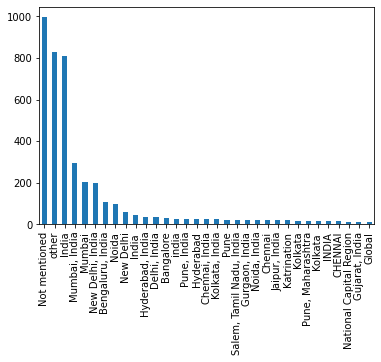

In [ ]:
df['Location'].value_counts().plot(kind='bar');

How many influential people are talking about Nykaa

In [ ]:
df.columns


Index(['User', 'Date Created', 'Day', 'Month', 'Number of Likes',
       'Source of Tweet', 'Tweet', 'Location', 'RetweetCount', 'Is Verified',
       'Followers', 'sentiment_analysis'],
      dtype='object')

In [ ]:
df['Is Verified'].sum()


955

people are influential or we can say which are celebrities

In [ ]:
verified_user_df=df[df['Is Verified']==True].groupby(['User', 'Date Created', 'Day', 'Month', 'Number of Likes',
       'Source of Tweet', 'Tweet', 'Location', 'RetweetCount', 'Is Verified',
       'Followers', 'sentiment_analysis']).size().reset_index(name='count')


verified_user_df.tail()


,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers,sentiment_analysis,count
950,vccircle,2022-11-09 15:14:16+00:00,9,11,1,Hootsuite Inc.,What Is The Secret Of s Success Falguni Nayar ...,New Delhi,0,True,54070,Negative,1
951,vccircle,2022-11-16 08:39:45+00:00,16,11,0,Hootsuite Inc.,Reliance Retail Eyeing TA Associates In TCNS ...,New Delhi,0,True,54070,Neutral,1
952,vccircle,2022-11-17 09:36:35+00:00,17,11,0,Hootsuite Inc.,Here s Why Has Slipped 20 In Last Four Session...,New Delhi,0,True,54070,Neutral,1
953,vccircle,2022-11-18 05:29:50+00:00,18,11,1,Hootsuite Inc.,TPG Likely To Have Sold Some In Again https t ...,New Delhi,1,True,54070,Neutral,1
954,vccircle,2022-11-22 12:15:27+00:00,22,11,0,Hootsuite Inc.,s CFO Arvind Agarwal Steps https t co MnL05dEXLe,New Delhi,3,True,54070,Neutral,1


In [ ]:
verified_user_df['User'].unique()

array(['5paisa', 'ABPNews', 'AEHarshada', 'AlArabiya_Eng',
       'AmarUjalaNews', 'AnilSinghvi_', 'AshVerma111', 'AsianetNewsSN',
       'BadaBusinessOff', 'BiIndia', 'Bollyhungama', 'BrandStoryboard',
       'CNBCBajar', 'CNBCTV18Live', 'CNBCTV18News', 'CNBCYoungTurks',
       'CNBC_Awaaz', 'Cashkarocom', 'DainikBhaskar', 'DelhiTimesTweet',
       'DnaHindi', 'ELLEINDIA', 'ETBrandEquity', 'ETHindi', 'ETMarkets',
       'ETNOWlive', 'ETNowSwadesh', 'ETRetail', 'ET_CIO', 'ETtech',
       'EarshotPodcasts', 'EconomicTimes', 'Ei_Samay', 'EntrepreneurIND',
       'FeminaIndia', 'FinancialXpress', 'FortuneIndia', 'GourabDas28',
       'GraziaIndia', 'INDmoneyApp', 'Inc42', 'IndiaToday',
       'JagbaniOnline', 'JagranNews', 'KarnatakaBank', 'LKPSECURITIES',
       'MirrorNow', 'MoneycontrolH', 'MotilalOswalLtd', 'NITIE_Official',
       'News18Kannada', 'Nigel__DSouza', 'NtvTeluguLive', 'Nupurkunia',
       'Oneindia', 'OneindiaKannada', 'PeopleMatters2', 'PoddarNisha',
       'PragattiObe

10000 atleast followers as influential people

In [ ]:
influential_people=verified_user_df.loc[verified_user_df['Followers']>10000] 
influential_people['User'].unique()


array(['5paisa', 'ABPNews', 'AEHarshada', 'AlArabiya_Eng',
       'AmarUjalaNews', 'AnilSinghvi_', 'AshVerma111', 'AsianetNewsSN',
       'BadaBusinessOff', 'BiIndia', 'Bollyhungama', 'BrandStoryboard',
       'CNBCBajar', 'CNBCTV18Live', 'CNBCTV18News', 'CNBCYoungTurks',
       'CNBC_Awaaz', 'Cashkarocom', 'DainikBhaskar', 'DelhiTimesTweet',
       'ELLEINDIA', 'ETBrandEquity', 'ETHindi', 'ETMarkets', 'ETNOWlive',
       'ETNowSwadesh', 'ETRetail', 'ET_CIO', 'ETtech', 'EarshotPodcasts',
       'EconomicTimes', 'Ei_Samay', 'EntrepreneurIND', 'FeminaIndia',
       'FinancialXpress', 'FortuneIndia', 'GraziaIndia', 'INDmoneyApp',
       'Inc42', 'IndiaToday', 'JagbaniOnline', 'JagranNews',
       'KarnatakaBank', 'LKPSECURITIES', 'MirrorNow', 'MoneycontrolH',
       'MotilalOswalLtd', 'News18Kannada', 'Nigel__DSouza',
       'NtvTeluguLive', 'Oneindia', 'OneindiaKannada', 'PeopleMatters2',
       'PoddarNisha', 'RuPay_npci', 'Stockstudy8', 'StocktwitsIndia',
       'SumitResearch', 'TV9Bh

In [ ]:
# tweets_df.to_csv('WEB SCRAPPING NYKAA TWEETS.csv')


QNS>1)What is the % growth in the tweet as compared to last month?

In [ ]:
print("Growth compare to two months:",(November_df['Tweet'].count()-Octomber_df['Tweet'].count())/Octomber_df['Tweet'].count()*100)


Growth compare to two months: 85.2212389380531


Qns>2)How many % of tweets were of positive sentiments

In [ ]:
print("Total Positive Value:",tweets_df['sentiment_analysis'].value_counts()['Positive'])


Total Positive Value: 1411


Qns>3)Top 5 most viral tweets (based upon retweets)

In [ ]:
top_viral_tweet_df.head(5)


,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers,sentiment_analysis
1469,shyamsek,2022-11-11 04:22:22+00:00,11,11,2291,Twitter for Android,This is for investors Assume you hold 100 Nyka...,CHENNAI,376,False,89311,Positive
122,Qid_Memez,2022-11-27 02:49:22+00:00,27,11,1662,Twitter for Android,https t co P8WpJ0cCMl,,128,False,63644,Neutral
644,darshitpatel84,2022-11-22 09:11:17+00:00,22,11,1268,Twitter Web App,RIP Rest In Peace to Shareholders of U have St...,"Ahmadabad City, India",110,False,109548,Neutral
3355,AnilSinghvi_,2022-09-29 01:42:52+00:00,29,9,1152,Twitter for iPhone,You heard this Market is a great equalizer IT...,"Delhi, Mumbai, India",87,True,684846,Positive
1443,shyamsek,2022-11-11 05:56:33+00:00,11,11,674,Twitter for Android,Clearly fails the smell test When a Co with fo...,CHENNAI,87,False,89311,Negative


Qns>4)How many influential people are talking about our product (whose followers are greater than 1000)


In [ ]:
influential_people['User'].unique()


array(['5paisa', 'ABPNews', 'AEHarshada', 'AlArabiya_Eng',
       'AmarUjalaNews', 'AnilSinghvi_', 'AshVerma111', 'AsianetNewsSN',
       'BadaBusinessOff', 'BiIndia', 'Bollyhungama', 'BrandStoryboard',
       'CNBCBajar', 'CNBCTV18Live', 'CNBCTV18News', 'CNBCYoungTurks',
       'CNBC_Awaaz', 'Cashkarocom', 'DainikBhaskar', 'DelhiTimesTweet',
       'ELLEINDIA', 'ETBrandEquity', 'ETHindi', 'ETMarkets', 'ETNOWlive',
       'ETNowSwadesh', 'ETRetail', 'ET_CIO', 'ETtech', 'EarshotPodcasts',
       'EconomicTimes', 'Ei_Samay', 'EntrepreneurIND', 'FeminaIndia',
       'FinancialXpress', 'FortuneIndia', 'GraziaIndia', 'INDmoneyApp',
       'Inc42', 'IndiaToday', 'JagbaniOnline', 'JagranNews',
       'KarnatakaBank', 'LKPSECURITIES', 'MirrorNow', 'MoneycontrolH',
       'MotilalOswalLtd', 'News18Kannada', 'Nigel__DSouza',
       'NtvTeluguLive', 'Oneindia', 'OneindiaKannada', 'PeopleMatters2',
       'PoddarNisha', 'RuPay_npci', 'Stockstudy8', 'StocktwitsIndia',
       'SumitResearch', 'TV9Bh

Qns>5)Which geographical location has the most tweets


In [ ]:
df['Location'].value_counts()


Not mentioned               996
other                       827
India                       811
Mumbai, India               297
Mumbai                      204
New Delhi, India            200
Bengaluru, India            105
Noida                        96
New Delhi                    61
India                        46
Hyderabad, India             34
Delhi, India                 33
Bangalore                    29
india                        27
Pune, India                  26
Hyderabad                    26
Chennai, India               24
Kolkata, India               24
Pune                         23
Salem, Tamil Nadu, India     22
Gurgaon, India               21
Noida, India                 21
Chennai                      20
Jaipur, India                20
Katrination                  19
Kolkata                      18
Pune, Maharashtra            16
Kolkata                      15
INDIA                        15
CHENNAI                      14
National Capital Region      11
Gujarat,

EDA
Most of the data are not mentioned.So,Except them Mumbai has the most tweets geographical wise.

[Text(0.5, 1.0, 'Tweet Distribute by Month')]

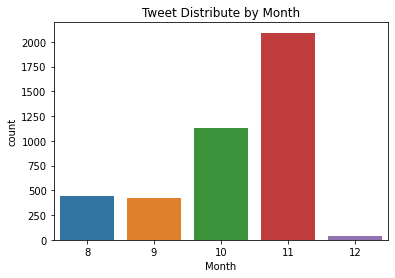

In [ ]:
import seaborn as sns
sns.countplot(x="Month", data=tweets_df).set(title='Tweet Distribute by Month')

EDA: Nov is the month of Pink friday sale

In [ ]:
tweets_df['sentiment_analysis'].value_counts()


Neutral     2007
Positive    1411
Negative     705
Name: sentiment_analysis, dtype: int64

[Text(0.5, 1.0, 'Sentiment of Tweets')]

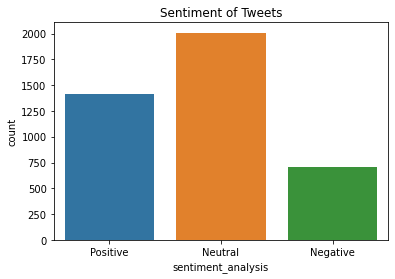

In [ ]:
import seaborn as sns
sns.countplot(x="sentiment_analysis", data=tweets_df).set(title='Sentiment of Tweets')



In [ ]:
grouped = df.groupby(by='Month')['sentiment_analysis'].value_counts()
grouped

Month  sentiment_analysis
8      Neutral                200
       Positive               150
       Negative                93
9      Neutral                210
       Positive               135
       Negative                77
10     Neutral                546
       Positive               399
       Negative               185
11     Neutral               1036
       Positive               712
       Negative               345
12     Neutral                 15
       Positive                15
       Negative                 5
Name: sentiment_analysis, dtype: int64

In [ ]:
unstacked = grouped.unstack(level=1)

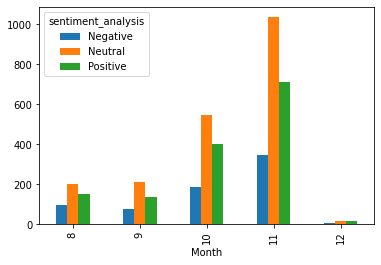

In [ ]:
unstacked.plot.bar()